<a href="https://colab.research.google.com/github/apcalam/image_captioning/blob/main/Image_Captioning_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image captioning

## Install Packages

In [ ]:
# Transformers installation
! pip install transformers datasets
# To install from source instead of the last release, comment the command above and uncomment the following one.
# ! pip install git+https://github.com/huggingface/transformers.git

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 16.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
ERROR: Operation cancelled by user


In [ ]:
! pip install transformers datasets evaluate -q
! pip install jiwer -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 27.9 MB/s eta 0:00:00


In [ ]:
!pip install string

ERROR: Could not find a version that satisfies the requirement string (from versions: none)
ERROR: No matching distribution found for string


In [ ]:
!pip install nltk

In [ ]:
!pip install bert-score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 116.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 92.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

## Load Test Dataset

In [ ]:
from google.colab import drive
from datasets import load_from_disk

# Mount Google Drive (ensure authorization if prompted)
drive.mount('/content/drive', force_remount=True)

# Verify the path exists in Google Drive
import os
dataset_path = "/content/drive/My Drive/image_caption/test_ds"
if not os.path.exists(dataset_path):
    raise FileNotFoundError(f"Dataset directory not found: {dataset_path}. Please check the path and ensure the dataset is saved there.")

# Load the saved dataset from Google Drive
test_ds = load_from_disk(dataset_path)

Mounted at /content/drive


In [ ]:
test_ds.num_rows

775

In [ ]:
example_image = test_ds["image"][715]

In [ ]:
test_ds = test_ds.filter(lambda x: x["caption"] != "Quality issues are too severe to recognize visual content.")

In [ ]:
len(test_ds)

671

## Load Saved Model

In [ ]:
from transformers import BlipForConditionalGeneration, BlipProcessor
import torch
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

device = "cuda" if torch.cuda.is_available() else "cpu"

# Load the model and processor
checkpoint = "Salesforce/blip-image-captioning-base"
processor = BlipProcessor.from_pretrained(checkpoint)
model = BlipForConditionalGeneration.from_pretrained(checkpoint)  # Load the architecture

# Load the state dictionary from Google Drive, mapping tensors to CPU
state_dict = torch.load("/content/drive/MyDrive/image_caption/pytorch_model_fine_tune.bin")

# Load the state dict into the model
model.load_state_dict(state_dict)

# Move the model to the desired device (CPU in this case)
model.to(device)

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

BlipForConditionalGeneration(
  (vision_model): BlipVisionModel(
    (embeddings): BlipVisionEmbeddings(
      (patch_embedding): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (encoder): BlipEncoder(
      (layers): ModuleList(
        (0-11): 12 x BlipEncoderLayer(
          (self_attn): BlipAttention(
            (dropout): Dropout(p=0.0, inplace=False)
            (qkv): Linear(in_features=768, out_features=2304, bias=True)
            (projection): Linear(in_features=768, out_features=768, bias=True)
          )
          (layer_norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): BlipMLP(
            (activation_fn): GELUActivation()
            (fc1): Linear(in_features=768, out_features=3072, bias=True)
            (fc2): Linear(in_features=3072, out_features=768, bias=True)
          )
          (layer_norm2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        )
      )
    )
    (post_layernorm): LayerNorm((768,), eps=1e-0

In [ ]:
from tqdm import tqdm
import torch

batch_size = 4

# add lists for the scores
captions = []
#scores = []

for i in tqdm(range(0, test_ds.num_rows, batch_size)):
    batch = test_ds["image"][i:i + batch_size]

    # # If you're using image paths:
    # if isinstance(batch[0], str):
    #     batch = [Image.open(img).convert("RGB") for img in batch]

    # Preprocess batch
    inputs = processor(images=batch, return_tensors="pt").to(device)
    pixel_values = inputs.pixel_values

    with torch.no_grad():
        generated_ids = model.generate(pixel_values=pixel_values, max_length=50, output_scores=True, return_dict_in_generate = True)

    # Decode outputs
    batch_captions = processor.batch_decode(generated_ids.sequences, skip_special_tokens=True)
    #scores.extend(logits_per_token)
    captions.extend(batch_captions)


100%|██████████| 168/168 [27:03<00:00,  9.66s/it]


## Metric Calculation

In [ ]:
from bert_score import score
P, R, F1 = score(captions, test_ds["caption"], lang="en", verbose=True)
print(f"BERTScore F1: {F1[0]:.4f}")
print(f"BERTScore R {R[0]:.4f}")
print(f"BERTScore P {P[0]:.4f}")

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/20 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/11 [00:00<?, ?it/s]

done in 4.32 seconds, 155.24 sentences/sec
BERTScore F1: 0.8473
BERTScore R 0.8578
BERTScore P 0.8371


In [ ]:
F1.mean(), R.mean(), P.mean()

(tensor(0.8774), tensor(0.8747), tensor(0.8805))

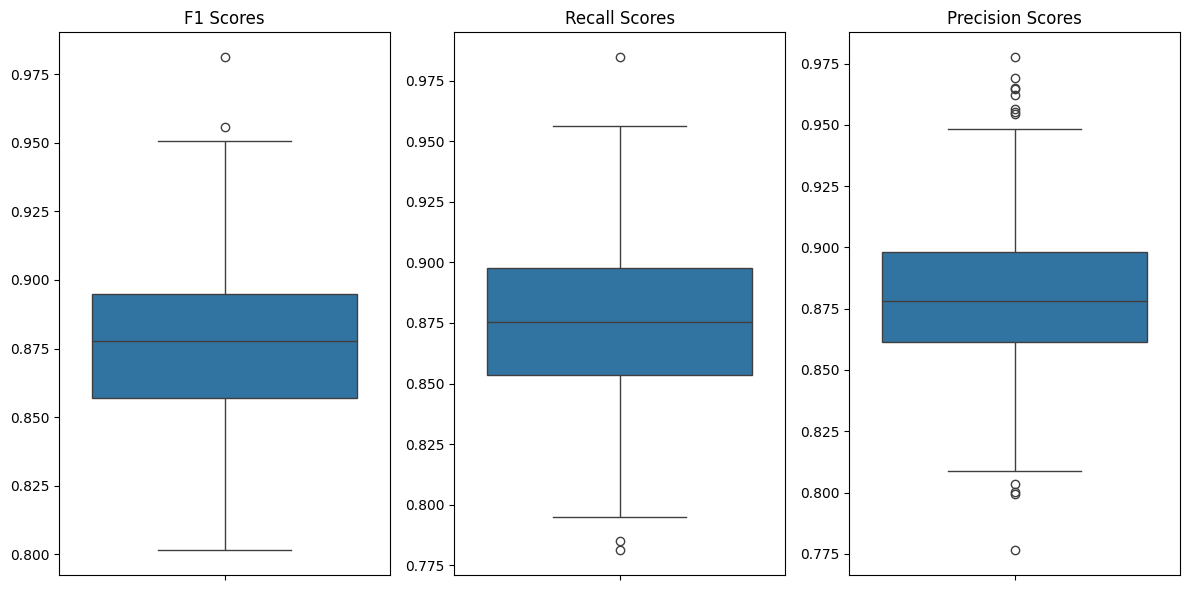

In [ ]:
# prompt: make 3 box plots for the F1, R, and P lists using seaborn  in same figure

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming F1, R, and P are already defined from the previous code
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.boxplot(y=F1)
plt.title('F1 Scores')

plt.subplot(1, 3, 2)
sns.boxplot(y=R)
plt.title('Recall Scores')

plt.subplot(1, 3, 3)
sns.boxplot(y=P)
plt.title('Precision Scores')

plt.tight_layout()
plt.show()


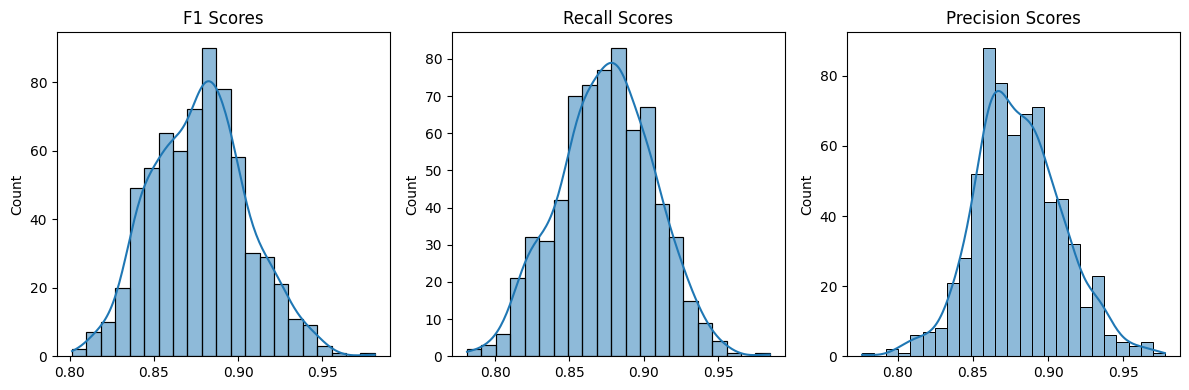

In [ ]:
# prompt: use seaborn to create a figure of 3 histograms not stacked over each other for F1, R, P

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 4))  # Adjust figure size for better spacing

plt.subplot(1, 3, 1)
sns.histplot(F1, kde=True)  # Use histplot for histograms with kde
plt.title('F1 Scores')

plt.subplot(1, 3, 2)
sns.histplot(R, kde=True)
plt.title('Recall Scores')

plt.subplot(1, 3, 3)
sns.histplot(P, kde=True)
plt.title('Precision Scores')

plt.tight_layout() # Ensures subplots don't overlap
plt.show()


## Inference and Uncertanity Scoring

In [ ]:
import string
import nltk
from nltk.corpus import stopwords

# One-time download
nltk.download("stopwords")

# Define stop words and punctuation
stop_words = set(stopwords.words("english"))
punctuation = set(string.punctuation)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import torch.nn.functional as F


def uncertanity_scores(image):
  inputs = processor(images=image, return_tensors="pt").to(device)
  pixel_values = inputs.pixel_values
  generated_ids = model.generate(pixel_values=pixel_values, max_length=50, output_scores=True, return_dict_in_generate = True)
  tokens = processor.batch_decode(generated_ids.sequences[0], skip_special_tokens=True)[1:-1]
  logits_per_token = generated_ids.scores

  # Convert logits to softmax probabilities per token
  probabilities = [F.softmax(logits, dim=-1) for logits in logits_per_token]

  # skip BOS token
  generated_token_ids = generated_ids.sequences[0][1:-1]

  # Get probability of each chosen token
  token_probs = [float(prob[0][token_id]) for prob, token_id in zip(probabilities, generated_token_ids)]

  dict_probs = {}
  sum_probs = 0
  count = 0
  for i in range(len(token_probs)):
    if tokens[i] in punctuation or tokens[i] in stop_words:
     pass
    else:
      dict_probs[tokens[i]] = token_probs[i]
      sum_probs += token_probs[i]
      count += 1

  return dict_probs, sum_probs/count






In [ ]:
dict_probs, avg_prob = uncertanity_scores(example_image)

In [ ]:
dict_probs

{'white': 0.6361099481582642,
 'tablet': 0.716791033744812,
 'wooden': 0.47311434149742126,
 'table': 0.6646386981010437}

In [ ]:
avg_prob

0.6226635053753853